In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('D:/MLworkspace/excelFiles/placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
df.shape

(200, 2)

Text(0, 0.5, 'Package (in lpa)')

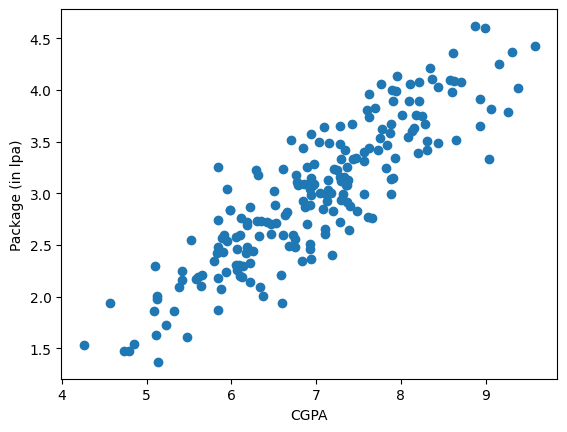

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package (in lpa)')

In [6]:
# x = df['cgpa']
# y = df['package']

#better way to do
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [7]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [8]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [11]:
x.shape

(200, 1)

In [12]:
y.shape

(200,)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(x_train,y_train)

LinearRegression()

In [16]:
LinearRegression()

LinearRegression()

Text(0, 0.5, 'Package (in lpa)')

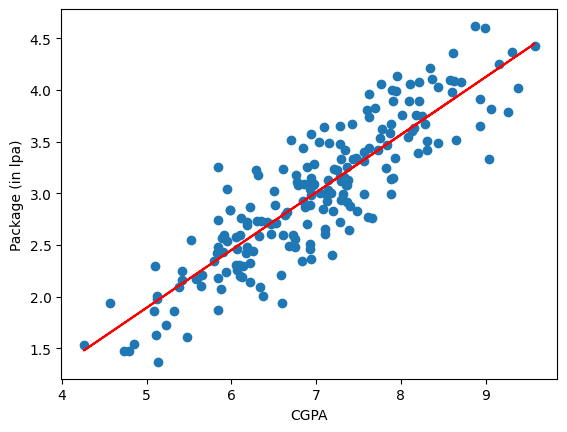

In [17]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package (in lpa)')

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [19]:
x_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [20]:
y_pred = lr.predict(x_test)

In [21]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [22]:
print("MAE",mean_absolute_error(y_test,y_pred)) # 0.28 LPA(so, 0.20 model making mistake)
print('MSE',mean_squared_error(y_test,y_pred)) #0.12 not in lpa (sqr hai toh error decreased)
# there is no direct funcition of RMSE, so
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred))) #0.34 LPA
print('R2Score',r2_score(y_test,y_pred))

#mns CGPA col 78% cgpa explain kr pa rha hai, output col me i.e.lpa

# if wanna adjusted r2 score
r2 = r2_score(y_test,y_pred)
x_test.shape
1-((1-r2)*(40-1)/(40-1-1)) #coz have only one col


MAE 0.2884710931878175
MSE 0.12129235313495527
RMSE 0.34827051717731616
R2Score 0.780730147510384


0.7749598882343415

In [23]:
#will add one Irrelevent random cols

new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200) #created 200 random values col which is not at all revelent

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.586358,3.26
1,5.12,0.931058,1.98
2,7.82,0.303545,3.25
3,7.42,0.205397,3.67
4,6.94,0.973094,3.57


Text(0, 0.5, 'package(in lpa)')

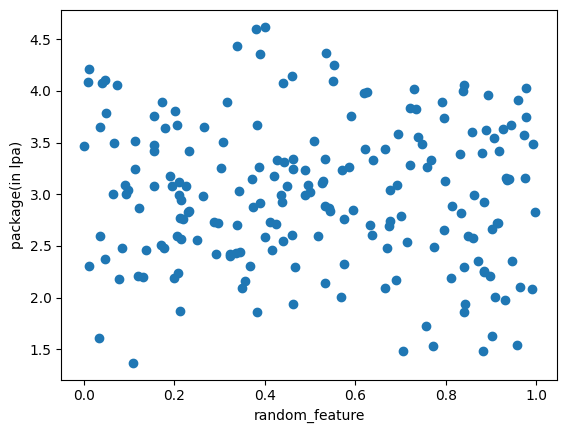

In [24]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('package(in lpa)')

In [25]:
x = new_df1.iloc[:,0:2] #[:,:] same
y = new_df1.iloc[:,-1]

In [26]:
x

,cgpa,random_feature
0,6.89,0.586358
1,5.12,0.931058
2,7.82,0.303545
3,7.42,0.205397
4,6.94,0.973094
...,...,...
195,6.93,0.416712
196,5.89,0.215019
197,7.21,0.462708
198,7.63,0.894191


In [27]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(x_test)

In [32]:
print('R2 Score', r2_score(y_test,y_pred)) #little bit r2 score increased 


R2 Score 0.7800324252619237


In [33]:
r2 = r2_score(y_test,y_pred)

In [34]:
#adjusted r2score
1 - ((1-r2)*(40-1)/(40-1-2)) # decreased  (reduce hona chhiye tha, reduce ho gya)

0.7681422860868926

In [35]:
# Now , we'll add column, jisse frk padega output col pe

new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [36]:
new_df2.sample(5)

,cgpa,iq,package
50,9.58,5.53,4.43
133,6.05,3.58,2.58
81,6.10,1.10,2.20
160,7.13,3.03,2.93
3,7.42,3.67,3.67


Text(0, 0.5, 'Package(in lpa)')

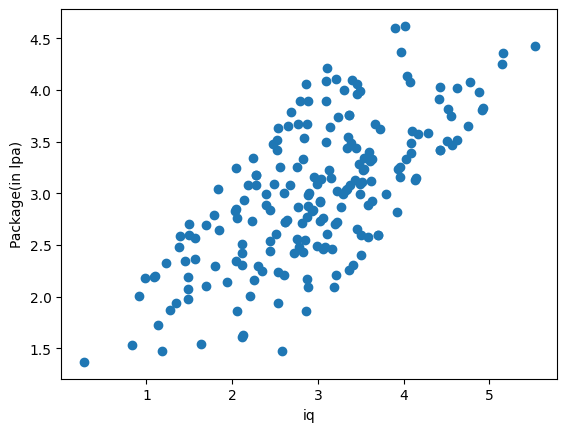

In [37]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [38]:
np.random.randint(-100,100)

-29

In [39]:
x = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [41]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [42]:
print("R2 score",r2_score(y_test,y_pred)) # increased
r2 = r2_score(y_test,y_pred) 

R2 score 0.7978487658247337


In [43]:

1 - ((1-r2)*(40-1)/(40-1-2)) #increased!

0.7869216720855301